## ROE指标

ROE是评价公司质量效率最高的因子。相比于企业的利润增长幅度，ROE指标更加稳定，且更接近公司创造价值的本质。

因为公司在前一个年度的净资本创造的价值，作为下一个年度新的净资本继续创造价值，以实现利润增长。

正常来讲，公司的归母利润增速应该为：
> ROE * (净资本扩大倍数)

当不存在增发等情况时，可以简化为：
> ROE * (1 - 分红率) 

当然这只是一个粗略的计算公式，会计准则上有很多不影响利润的净资产增减方式，但这类异常一般数额不大，或者较少发生，因此先忽略

### ROE与归母利润增速

当前PEG估值法占据了A股股票估值的主流，按照PEG法，公司利润增速是估值的核心参考指标

ROE与归母利润的增速可以由上述公式推导，但这与我们直观感觉不符

因为公司的ROE比较稳定，但利润增速波动却非常大，我个人认为，这主要是因为：
 - ROE波动范围小但幅度大
    - 部分公司的ROE在0-30%之间波动，在其它条件不变的情况下，ROE从5提升到15，那利润将是200%的增长
 - ROE增长与净资本增长是乘法关系
    - 假如某公司前一年度ROE=10%,后一年度通过增发将净资本提高30%，不分红情况下利润留存可使净资本提升10%，ROE跃升至15%
    - 那么后一年度的利润增长速度为
    - > (1 + ( 15 - 10 ) / 10) * (1 + 30% + 10% ) - 1 =  109%
  
 - ROE对净资产的贡献是指数形式的
  
总之：<b>归母利润增速对ROE的变化是比较敏感的</b>

### 杜邦分析

> ROE = 周转率 * 净利率 * 杠杆率

ROE可以拆解为3个指标，这3个指标都与企业的经营息息相关，可以更容易地根据企业经营情况进行预测

按照我的理解，周转率主要与需求和运行效率有关，净利率同样，杠杆率影响企业的生产力

企业经营平稳的话，这3个指标一般不会剧烈变动，发生突变时很容易观察到外部信号

所以分析时，可以根据这3个指标的变动来推测新年度ROE，继而预测利润增速

### 做这个研究的目的

当前的A股市场对净利润增速的看重是丧失理智的，甚至是根据最近1季度、最近1月、最近1周的利润增速来给对应的PE估值。

1. 净利润的增速摆脱不了ROE，在原来ROE较低时可以实现高增长，但ROE的增长是有天花板的，而且非常矮；
2. 一些企业依靠增发实现利润增长，这其实是一种“虚假”的增长。

    企业增发当然是一种正常行为，但从ROE的角度，增发本身就能贡献相当规模的净利润增速，看似很高的增速摊薄到总股本，或者净资本上，增速可能会非常平庸。
    
    另外，企业必须靠资产赚钱，要实现跨越式发展，没有足够的资产是绝对不可能的。例如，当一个企业的市场空间无比广阔时，基于ROE的分析会告诉你，企业现有的资产所能支持的最大产能是多少，利润的天花板在哪里。

### 研究内容
所以这篇研究的目的，是统计A股市场所有公司，自2015年以来，各公司年度ROE的分布情况，以及杜邦分析3因子的分布情况，

历史大数据不会骗人，所有公司20年间的平均ROE分布情况。所得到的统计结果能用于判断，我们是否对某些公司的未来发展寄予了过高的期望。




In [13]:
from jqfactor import get_factor_values
from jqdata import  get_trade_days
import numpy as np

# 对factor因子过去15年按年度的指标进行统计分析
def stas_factor(factor, report = 'year', num = 15):
    
    # 当前security数量为4539，超过3000上限，所以分为2部分
    security = get_all_securities().index.tolist()
    security_1 = security[0:3000]
    security_2 = security[3000:]
    
    factor_list = []
    max_factor = []
    
    for ii in np.arange(2006, 2021, 1):
        # 选择年报公布截止日后15天
        date = str(ii) + '-5-15'
        date = get_trade_days(end_date = date, count = 1)[0]
        
        fac_values = pd.DataFrame()
        for security in [security_1, security_2]:
            # roe_ttm, net_profit_ratio， 1/equity_to_asset_ratio， total_asset_turnover_rate
            fac_values_t = get_factor_values(securities=security, factors=factor,
                                            start_date=date, end_date=date)
            # col_name: securities, row_name: date
            fac_values_t = fac_values_t[factor]
            # assert fac_values.shape[0] == 1
            fac_values = pd.concat([fac_values, fac_values_t], axis = 1)

            # 获取每一年的最大指标，注意要对因子取倒数得到杠杆率
            # for index, row in fac_values.iterrows():
        if not factor == 'equity_to_asset_ratio':
            max_factor.append( [date, fac_values.idxmax(axis=1), fac_values.max(axis=1)] )
#             tmp = fac_values.iloc[0:,].dropna().iloc[0,:]
#             tmp = 1/np.array(tmp.tolist())
#             factor_list += tmp.tolist()
        else:
            max_factor.append( [date, fac_values.idxmin(axis=1)[0], 1 / (fac_values.min(axis=1)[0])] )
            
        factor_list += fac_values.iloc[0,:].dropna().tolist()

        # print('number of valid factor: ', date, fac_values.iloc[0,:].dropna().tolist())

    return [factor_list, max_factor]

In [14]:
%%time

import pandas as pd
import numpy as np

# ROE，净利润率，权益资产比，总资产周转率
fac_list = ['roe_ttm', 'net_profit_ratio', 'equity_to_asset_ratio', 'total_asset_turnover_rate']

values_list = {}
maxv_list = {}

for factor in fac_list:
    [fac_values, max_fac] = stas_factor(factor)
    values_list[factor] = fac_values
    maxv_list[factor] = max_fac


CPU times: user 3.08 s, sys: 82.8 ms, total: 3.17 s
Wall time: 17.7 s


In [46]:
# 将权益资产率转为杠杆率
def inverse(value_inv):
    tmp = np.array(value_inv)
    tmp[tmp == 0] = 0.001
    return (1/tmp).tolist()

values_list['leverage rate'] = inverse(values_list['equity_to_asset_ratio'])

### 结果说明
两个变量：

- values_list: 每个指标在过去15年，所有股票的年度值的列表，用于后续统计分析
- maxv_list： 每个指标，每年最大值对应的股票代码，用于特例分析

### ROE及相关变量的分布密度图

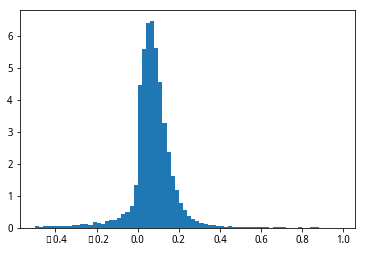

In [38]:
''' roe_ttm ''' 
ran = np.arange(-0.5,1,0.02)
cnt = plt.hist(values_list['roe_ttm'], bins=ran,density=True)

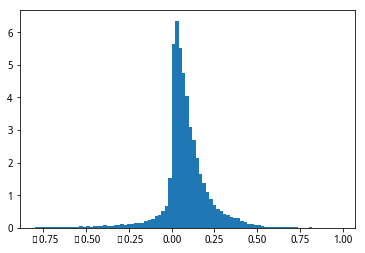

In [41]:
''' net_profit_ratio '''
ran = np.arange(-0.8,1,0.02)
cnt = plt.hist(values_list['net_profit_ratio'], bins=ran,density=True)

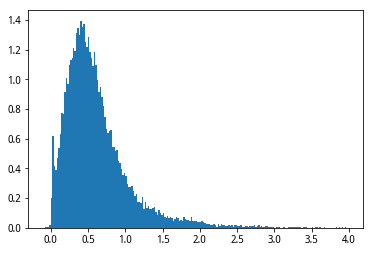

In [45]:
''' total_asset_turnover_rate '''
ran = np.arange(-0.1,4,0.02)
cnt = plt.hist(values_list['total_asset_turnover_rate'], bins=ran,density=True)

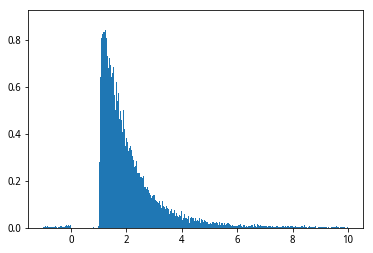

In [49]:
''' leverage rate '''
ran = np.arange(-1,10,0.02)
cnt = plt.hist(values_list['leverage rate'], bins=ran,density=True)

### 各因子分布总结
4个指标都服从正态分布或正态分布的变种，当然这里我没有进行严格的检验

注意看每个指标分布密度图的横轴，每个指标分布的尾部厚度也各不相同

4个指标均存在非常变态的异常值，且都存在负值

“总资产周转率”和“杠杆率”都存在几个负值，这说明有些企业连<b>营收和净资本都能做成负的</b>，简直不可思议

In [37]:
def analysis_fac(values_list):
    
    # 注意不要提前定义名字，否则在concat操作时会对比改名字与tmp变量的列名，导致无法比较错误
    result = pd.DataFrame()
    # 构造最大、最小、平均、中位、上四分位值
    for fac in values_list:
        df_tmp = pd.DataFrame([[fac, np.max(values_list[fac]), np.min(values_list[fac]), np.median(values_list[fac]),
                                np.percentile(values_list[fac], 75), np.percentile(values_list[fac], 95)]])
        result = pd.concat([result, df_tmp], axis = 0, ignore_index=True)
    result.columns = ['FACTOR','MAX','MIN','MEDIAN','%75 Perc','95% Perc']
    
    if 'equity_to_asset_ratio' in result['FACTOR']:
        result.iloc[result['FACTOR'] == 'equity_to_asset_ratio',0] == 'leverage rate'
    
    return result  

### 指标的统计信息

选取了5个指标来观察，最重要的是中位数和95分位数值

中位数是15年来所有上市公司经营的中间水平，而95分位数可以看作一个严格的“经营得好”的标准

In [52]:
aaa = analysis_fac(values_list)
aaa

,FACTOR,MAX,MIN,MEDIAN,%75 Perc,95% Perc
0,roe_ttm,1104.826208,-708.597634,0.068484,0.115252,0.224338
1,net_profit_ratio,1277.724731,-249.076313,0.064592,0.135162,0.335705
2,equity_to_asset_ratio,1.227190,-1331.978181,0.559754,0.734924,0.902669
3,total_asset_turnover_rate,733.210326,-0.896997,0.515525,0.778080,1.503839
4,leverage rate,11111.111111,-384.172109,1.754646,2.512667,5.205687


### 结果分析
1. ROE
 - ROE最高能有1104，不可思议。但中位数比较正常，6.8%确实是A股上市公司的中间水平，这个指标其实也就勉强跑赢定期理财，也就是说很多公司都在做着“价值毁灭”的事情
 - ROE的75分位数是11.5%，比预想中低一些
 - ROE的95分位数是22.4%，用这种方法统计出的分位数数值对优秀的定义要严苛一些。但这也说明，持续做到20%以上ROE的公司，绝对是前5%的超级优等生

2. 净利润率
 - 净利率的极值同样惊悚，这肯定是经营上有异常情况，净利润比营收还多。
 - 净利率中值、75分位数和95分位数之间的差值大于ROE对应指标，说明优秀企业更容易做到更高的净利率
 - 净利率的基础是毛利率，白酒毛利率高达90%，制造业毛利率可能不到10%，所以净利率指标应该行业高度相关
3. 杠杆率
 - 从财务稳健的角度，杠杆率越低越好
 - 从经营的角度，适度利用无息或低息负债是经营者的义务
 - 中值1.75，对应大概43%的负债率，95分位数5.2，对应超过80%的负债率，确实很危险
4. 总资产周转率
 - 总资产周转率优秀的指标是1.5，一些消费行业的公司应该可以轻松做到
 - 中值只有0.51，挺意外的

### 一个有趣的现象
4个指标对应的中值满足：
> MEDIAN：  净利润率 * 总资产周转率 * 杠杆率 < ROE

而在75分位数则有：
> 75 PERC： 净利润率 * 总资产周转率 * 杠杆率 > ROE

这大概说明，公司要优秀，只需要在某一方面突出；但想要及格，必须各方面都在及格线以上。

也可能说明好的公司会让自己4个指标都在前50%。

In [89]:
# 分析各指标的最大值在各年度对应的股票名称，杠杆率的分析应该没啥意义，杠杆率越高一般越不好

def analysis_max_fac(maxv):
    # 得出每年最大值对应股票和相关数据
    # 最后要对每个指标得出一个dataframe，包含其名字加当时的其他几个指标，各指标及其
    # maxv['leverage rate'] = maxv.pop('equity_to_asset_ratio')
    
    maxv_all = {}
    
    all_info = get_all_securities()
    all_info['code'] = all_info.index
    all_info = all_info[['code','display_name']]
    
    
    for key in maxv:
        print(key)
        
        df = pd.DataFrame(maxv_list[key])
        df.columns = ['date','code','value']
        if not (key == 'leverage rate'):
            df = pd.concat( [df['date'], df[['code','value']].applymap(lambda x : x[0])], axis = 1)
        df = pd.merge(df, all_info, on = 'code')
        
#         sec_list = df['code'].tolist()
#         extra_info = get_factor_values(securities=security, factors=[
#             'roe_ttm', 'net_profit_ratio', 'equity_to_asset_ratio', 'total_asset_turnover_rate'],
#                                             start_date=date, end_date=date)
        maxv_all[key] = df

    return maxv_all

In [90]:
maxv_all = analysis_max_fac(maxv_list)

roe_ttm
net_profit_ratio
total_asset_turnover_rate
leverage rate


### 极值分析

各指标历年最大值，对应的股票名称

In [92]:
maxv_all['roe_ttm']

,date,code,value,display_name
0,2006-05-15,600092.XSHG,13.340086,S*ST精密
1,2007-05-15,600137.XSHG,27.178778,浪莎股份
2,2008-05-15,600703.XSHG,1104.826208,三安光电
3,2009-05-15,600734.XSHG,54.756228,*ST实达
4,2010-05-14,000498.XSHE,34.799883,山东路桥
5,2011-05-13,000719.XSHE,33.585870,中原传媒
6,2012-05-15,000030.XSHE,1060.058871,富奥股份
7,2013-05-15,600228.XSHG,66.256447,返利科技
8,2014-05-15,000017.XSHE,217.761965,深中华A
9,2015-05-15,000520.XSHE,31.807099,长航凤凰


In [93]:
maxv_all['net_profit_ratio']

,date,code,value,display_name
0,2006-05-15,000555.XSHE,11.737233,神州信息
1,2007-05-15,600187.XSHG,161.800038,国中水务
2,2008-05-15,600745.XSHG,216.780837,闻泰科技
3,2009-05-15,000656.XSHE,27.946819,金科股份
4,2010-05-14,600556.XSHG,58.200071,天下秀
5,2011-05-13,600705.XSHG,75.604786,中航产融
6,2012-05-15,000609.XSHE,26.100249,*ST中迪
7,2013-05-15,000557.XSHE,75.757692,西部创业
8,2014-05-15,000056.XSHE,82.196201,皇庭国际
9,2015-05-15,600696.XSHG,1277.724731,岩石股份


In [94]:
maxv_all['total_asset_turnover_rate']

,date,code,value,display_name
0,2006-05-15,600822.XSHG,7.817635,上海物贸
1,2007-05-15,600822.XSHG,7.345251,上海物贸
2,2008-05-15,600822.XSHG,6.591453,上海物贸
3,2010-05-14,600822.XSHG,6.433606,上海物贸
4,2013-05-15,600822.XSHG,7.734610,上海物贸
5,2014-05-15,600822.XSHG,7.939628,上海物贸
6,2016-05-13,600822.XSHG,11.317973,上海物贸
7,2009-05-15,000626.XSHE,7.484329,远大控股
8,2018-05-15,000626.XSHE,12.262256,远大控股
9,2011-05-13,000719.XSHE,733.210326,中原传媒


In [95]:
maxv_all['leverage rate']

,date,code,value,display_name
0,2006-05-15,000030.XSHE,-0.023549,富奥股份
1,2009-05-15,000030.XSHE,-0.010208,富奥股份
2,2011-05-13,000030.XSHE,-0.015223,富奥股份
3,2007-05-15,000506.XSHE,-0.000751,中润资源
4,2008-05-15,000506.XSHE,-0.004381,中润资源
5,2010-05-14,000892.XSHE,-0.006412,欢瑞世纪
6,2012-05-15,600817.XSHG,-0.056760,宏盛科技
7,2013-05-15,000555.XSHE,-0.073605,神州信息
8,2014-05-15,000520.XSHE,-0.112784,长航凤凰
9,2015-05-15,600145.XSHG,-0.022652,*ST新亿


### 极值分析
粗略看一下15年间ROE的极值对应的公司，及其杜邦分析的几个指标

基本就不用深入分析了，15年间ROE极值，4家目前ST，1家退市，1家退市又上市，另外还有几个换过好几个名字的

总的来说就是，ROE不需要太高，够用就好，最高是能稳定在一个优秀的位置

太高一定是经营出现了重大波动

### ROE与股价
ROE是评价公司质量最有用的单一指标，但我们当然需要组合更多指标来追求更准确的评价。

全A股，15年来，在考虑各路妖魔鬼怪的情况下，能做到22%的ROE就是前5%

ROE是一个比较稳定的指标，所以在未来这个标准会持续

<b>ROE的极限构成了公司净利润增长率的天花板，这与行业有多大的前景无关</b>

当然，ROE高低与股价的短期涨跌无直接关系，毕竟市场总会受短线情绪影响

当前市场估值以PEG法为基础，“唯利润增长率论”，而利润增速又对ROE提升很敏感

但做投资，还是应当回归“资产创造价值”的基本逻辑

### 几个技术问题
1. get_trade_days只对2005年及以后有效
    > date = '2005-5-15' 
    > date = get_trade_days(end_date = date, count = 1)
    > date
    > None
2. factor支持的查询最大数量是3000，也就是股票数*日期数*因子数，单次不能超过3000